### Parsing

In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("catalog.csv")

# set seed for reproducibility
np.random.seed(0)

In [2]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


#### Date data
Pandas has a specific data-type for dates, namely datetime64. Currently the date-column has the datatype object. Lets change that!

In [13]:
# Check with str - length wether all entries in date follow the same structure as observed above
date_length = landslides.date.str.len()
date_length.value_counts()

date
7.0    1075
6.0     368
8.0     247
Name: count, dtype: int64

In [6]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")
# 1/17/07 has the format "%m/%d/%y", 17-1-2007 has the format "%d-%m-%Y"
# or if different formats are used try: landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)

# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [7]:
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

Check whether we parsed in the right manner:

<Axes: xlabel='date_parsed', ylabel='Count'>

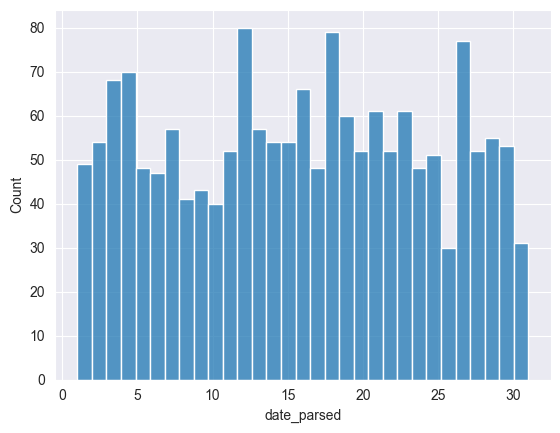

In [10]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.histplot(day_of_month_landslides, kde=False, bins=31)

For more complex parsing tasks one could also write a function oneself. See the following example:

Try parsing the column "Last Known Eruption" from the volcanos dataframe. This column contains a mixture of text ("Unknown") and years both before the common era (BCE, also known as BC) and in the common era (CE, also known as AD).

In [ ]:
'''
def row_parser(row):
    val = str(row['Last Known Eruption'])
    if (val[-3:]=='BCE' or val[:-2]=='BC'):
        vz = -1
    else:
        vz = 1
    if val[-3:] == 'BCE':
        return vz*int(val[:-4])
    elif val == 'Unknown':
        return None
    else:
        return vz*int(val[:-3])

volcanos['Year'] = volcanos.apply(row_parser, axis='columns')
'''

### Character Encoding

In [14]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import charset_normalizer

# set seed for reproducibility
np.random.seed(0)

In [17]:
# start with a string
before = "This is the euro symbol: €"
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

print(type(after))
print(after)
print(after.decode("utf-8"))

<class 'bytes'>
b'This is the euro symbol: \xe2\x82\xac'
This is the euro symbol: €


Compare this to

In [18]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


This is bad and we want to avoid doing it! It's far better to convert all our text to UTF-8 as soon as we can and keep it in that encoding. The best time to convert non UTF-8 input into UTF-8 is when you read in files.

If we try to read files that are nor UTF-8 (which python assumes by default) we run into an UnicodeDecodeError. To figure out the actual decoding one can use the charset_normalizer module to try and automatically guess what the right encoding is. It's not 100% guaranteed to be right, but it's usually faster than just trying to guess.

If you have a file that's in UTF-8 but has just a couple of weird-looking characters in it, you can try out the ftfy module and see if it helps.

In [21]:
# look at the first ten thousand bytes to guess the character encoding
with open("ks-projects-201612.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read())

# check what the character encoding might be
print(result)

{'encoding': 'mac_iceland', 'language': 'English', 'confidence': 0.9992}


In [25]:
# kickstarter_2016 = pd.read_csv("ks-projects-201612.csv") # this leads to an error
kickstarter_2016 = pd.read_csv("ks-projects-201612.csv", encoding='mac_iceland')

# look at the first few lines
kickstarter_2016.head()

C:\Users\laura\AppData\Local\Temp\ipykernel_18188\3186025631.py:2: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_2016 = pd.read_csv("ks-projects-201612.csv", encoding='mac_iceland')


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [23]:
# save our file (will be saved as UTF-8 by default!)
# kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")

### Inconsistent Text Entries

In [28]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

# read in all our data
professors = pd.read_csv("pakistan_intellectual_capital.csv")

# set seed for reproducibility
np.random.seed(0)
professors.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


Check for inconsistency and typos, e.g. in Country

In [29]:
# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

Strip all entries of emptyspaces and make them lower case:

In [33]:
# convert to lower case
professors['Country'] = professors['Country'].str.lower()
# remove trailing white spaces
professors['Country'] = professors['Country'].str.strip()

In [34]:
# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

We're going to use the fuzzywuzzy package to help identify which strings are closest to each other. Fuzzywuzzy returns a ratio given two strings. The closer the ratio is to 100, the smaller the edit distance between the two strings.

In [36]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()

    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings,
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > min_ratio
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match

    # let us know the function's done
    print("All done!")

In [37]:
replace_matches_in_column(df=professors, column='Country', string_to_match="south korea")

All done!


In [38]:
# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)